# TME visualisation de données

**Auteur :** François Bouchet

**Durée :** 2h

**Binome :** Ines Rahaoui et Inés Tian Ruiz-Bravo Plovins

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

## Partie 1 : les bases avec matplotlib (1h15)

### 1.1. Chargement des données (5 minutes)

Dans ce TME, nous allons nous appuyer sur un jeu de données fourni avec une des bibliothèques chargées initialement (seaborn), à savoir le dataset nommé `penguins`. Ce jeu de données propose des mesures de trois espèces de manchots, et inclut les attributs suivants :
* nom de l'espèce
* île d'observation
* longueur du bec
* largeur du bec
* longueur des ailes
* masse
* genre

In [4]:
# Chargement
penguins = sns.load_dataset("penguins")
# Visualisation des premières lignes sous forme de tableau
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### 1.2. Créer une première figure avec matplotlib (10 minutes)

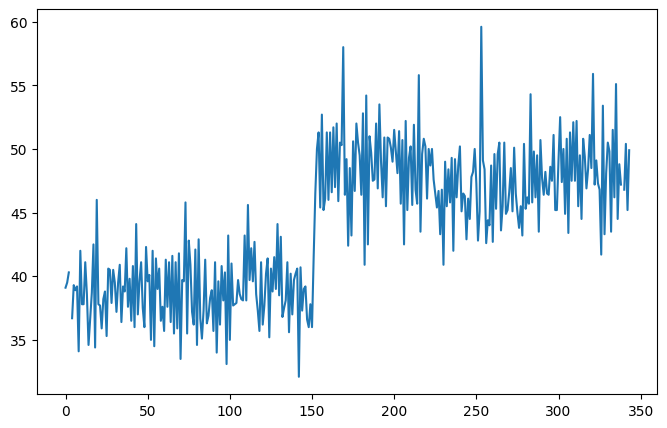

In [16]:
# Créer une figure de taille 8x5 points, avec 100 points par pouce
plt.figure(figsize=(8, 5), dpi=100)

# Créer un graphique à une seule zone (de taille 1x1 et sélecteur 1)
ax = plt.subplot(111)

# Plot bill_length_mm avec comme axe des x les index et comme axe des y les valeurs de bill_length_mm
ax.plot(penguins.index, penguins["bill_length_mm"], label="Longueur bec (mm)")

# Afficher le résultat à l'écran
plt.show()

Bleu et orange sont les couleurs choisies en premier  "par défaut" de matplotlib. 
Vous pouvez les changer en utilisant le paramètre `color` de la méthode plot. 

Choisissez d'autres couleurs (visuellement distinctes) parmi celles disponibles dans la liste suivante, en préfixant son nom par "xkcd:" : 
    https://xkcd.com/color/rgb/
    
Vous conserverez ces couleurs dans ce même ordre pour tous les graphiques suivants.

### 1.3. Compléter une figure (30 minutes)

L'objectif général est maintenant d'arriver à une figure plus complète telle que celle ci-dessous :

<img src="./graph1.png">

Pour ce faire, nous allons successivement :
* Afficher sur la même figure les largeurs de bec et les longueurs de bec des manchots en ajoutant l'attribut **bill_depth_mm** à notre graphique, à l'aide de la fonction `plot` sur la même figure (1 ligne), en choisissant comme précédemment une couleur xkcd visuellement distincte pour cet attribut
* Changer la largeur de la ligne de bill_length_mm à 2 pour la rendre plus visible (1 ligne à modifier) via le paramètre `linewidth`
* Ajouter une légende à notre graphique pour identifier les différentes courbes (1 ligne) via la fonction `legend`
* Ajouter un titre à notre graphique (1 ligne) via la fonction `set_title`
* Ajouter des étiquettes aux axes x et y (2 lignes) via les fonctions `set_xlabel` et `set_ylabel`
* Modifier les graduations (ticks) des axes x de 50 en 50 (1 ligne) via la fonction `set_xticks` et y de 10 en 10 (1 ligne) via la fonction `set_yticks`
* Ajouter une grille sur l'axe des y via la fonction `grid` (1 ligne) en adaptant éventuellement le style de la ligne (paramètre `linestyle`) et sa transparence (paramètre `alpha`)
* Modifier les limites des axes x et y pour que les graduations correspondent aux valeurs des données (2 lignes) via les fonctions `set_xlim` et `set_ylim`
* Ajouter une annotation sur le graphique pour pointer une valeur particulière (1 ligne) via la fonction `annotate`, 
en incluant une flèche à l'aide de l'attribut `arrowprops`

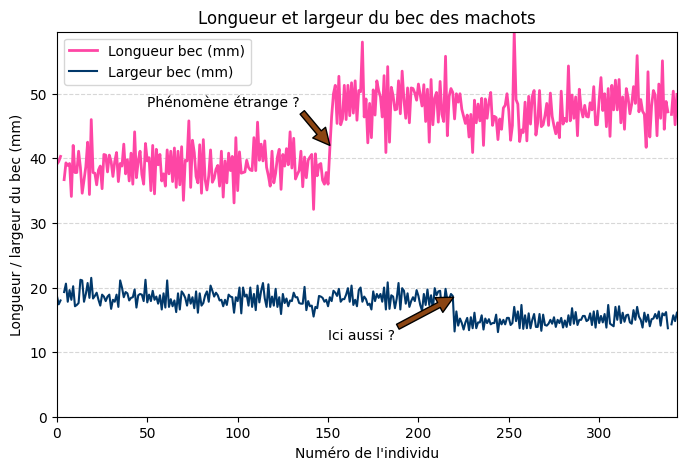

In [72]:
# Créer une figure de taille 8x5 points, avec 100 points par pouce
plt.figure(figsize=(8, 5), dpi=100)

# Créer un graphique à une seule zone (de taille 1x1 et sélecteur 1)
ax = plt.subplot(111)

# Plot bill_length_mm avec comme axe des x les index et comme axe des y les valeurs de bill_length_mm
ax.plot(penguins.index, penguins["bill_length_mm"], label="Longueur bec (mm)", linewidth=2, c='xkcd:barbie pink')
ax.plot(penguins.index, penguins["bill_depth_mm"], label="Largeur bec (mm)", linewidth=1.5, c='xkcd:marine blue')

plt.legend()

plt.title("Longueur et largeur du bec des machots")
plt.xlabel("Numéro de l'individu")
plt.ylabel("Longueur / largeur du bec (mm)")


xmax = np.max(penguins.index)
ymax= np.max(penguins["bill_length_mm"])
plt.xticks(np.arange(0, xmax, 50))
plt.yticks(np.arange(0, ymax, 10))

plt.grid(linestyle='--',axis='y', alpha=0.5)

plt.xlim(0, xmax)
plt.ylim(0, ymax)

plt.annotate('Phénomène étrange ?', xytext=(50,48), arrowprops=dict(facecolor='saddlebrown'), xy=(151,42))
plt.annotate('Ici aussi ?', xytext=(150,12), arrowprops=dict(facecolor='saddlebrown'), xy=(219.5,18.5))

# Afficher le résultat à l'écran
plt.show()

<font color="red">**Note importante :** toute figure que vous serez amené à générer dans d'autres UE par la suite **devra** avoir toutes ces informations présentes pour être considérées comme complètes et potentiellement compréhensibles par leur destinataire</font>

### 1.4. Sous-figures (15 minutes)

Il y a un certain nombre de points discutables dans le graphique précédent. 
Par exemple, le fait d'avoir relié entre eux des points dont les indices sont consécutifs n'a pas vraiment de sens ici, voire peut être trompeur (cf. les flèches).
Par ailleurs, on ne s'est concentré que sur deux variables, alors que le jeu de données en contient d'autres.

Idéalement, on voudrait représenter chaque variable sur un graphique séparé, et les comparer entre elles.
Matplotlib permet de réaliser cela à l'aide des sous-graphiques (subplots).
L'objectif de cette partie est donc de réaliser un graphique contenant plusieurs sous-graphiques, chacun représentant une variable du jeu de données penguins.
Le rendu final devrait ressembler à un sous-ensemble de ceci (généré "automatiquement" avec une boucle pour itérer sur les espèces et les paramètres - mais ce n'est pas demandé ici !) :

<img src="graph2.png">

Pour commencer, il faut choisir deux des trois sous-espèces de manchots - c'est facilement faisable en utilisant la syntaxe des DataFrames de la bibliothèque `pandas`, le jeu de données ayant été chargé dans une DataFrame. Mais c'est hors-sujet ici donc voici la syntaxe pour sélectionner par exemple uniquement les manchots Adélie de sexe féminin :

In [100]:
penguins[(penguins["species"] == "Adelie") & (penguins["sex"] == "Female")]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,Female
...,...,...,...,...,...,...,...
142,Adelie,Dream,32.1,15.5,188.0,3050.0,Female
144,Adelie,Dream,37.3,16.8,192.0,3000.0,Female
147,Adelie,Dream,36.6,18.4,184.0,3475.0,Female
148,Adelie,Dream,36.0,17.8,195.0,3450.0,Female


Pour rappel, vous allez sélectionner 2 sous-espèces (cf. syntaxe ci-dessus) qui seront représentées sur 2 colonnes, et 2 attributs qui seront représentés sur 2 lignes. 
Pour ce faire, nous allons repartir (copier-coller) du code précédent et successivement :
* Créer des sous-figures pour chaque graphique à l'aide de la méthode `subplots` - le nombre de lignes et de colonnes est à définir, suivi du sélecteur de la sous-figure (tout à 1 sur l'exemple précédent). 
Après cela, vous devriez pouvoir facilement reproduire la figure initiale en 2 xemplaires pour tester.
* Adapter les limites des axes pour chaque sous-figure


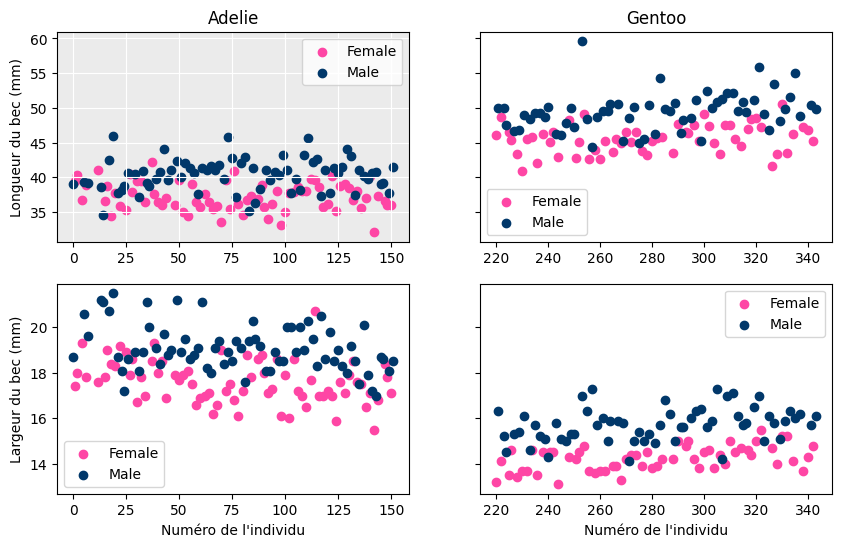

In [ ]:
adelieF  = penguins[(penguins['species'] == 'Adelie') & (penguins['sex']=='Female')]
adelieM  = penguins[(penguins['species'] == 'Adelie') & (penguins['sex']=='Male')]
gentooF =  penguins[(penguins['species'] == 'Gentoo') & (penguins['sex']=='Female')]
gentooM  = penguins[(penguins['species'] == 'Gentoo') & (penguins['sex']=='Male')]

plt.figure(figsize=(10,6), dpi=100)


al = plt.subplot(221, facecolor='#EBEBEB')
gl = plt.subplot(222, sharey=al, facecolor='#EBEBEB')
ad = plt.subplot(223, facecolor='#EBEBEB')
gd = plt.subplot(224, sharey=ad, facecolor='#EBEBEB')

al.grid(color='white')
# bill_length_mm
al.scatter(adelieF.index, adelieF["bill_length_mm"], label="Female", c='xkcd:barbie pink')
al.scatter(adelieM.index, adelieM["bill_length_mm"], label="Male", c='xkcd:marine blue')
gl.scatter(gentooF.index, gentooF["bill_length_mm"], label="Female", c='xkcd:barbie pink')
gl.scatter(gentooM.index, gentooM["bill_length_mm"], label="Male", c='xkcd:marine blue')
# bill_depth_mm
ad.scatter(adelieF.index, adelieF["bill_depth_mm"], label="Female", c='xkcd:barbie pink')
ad.scatter(adelieM.index, adelieM["bill_depth_mm"], label="Male", c='xkcd:marine blue')
gd.scatter(gentooF.index, gentooF["bill_depth_mm"], label="Female", c='xkcd:barbie pink')
gd.scatter(gentooM.index, gentooM["bill_depth_mm"], label="Male", c='xkcd:marine blue')

gl.tick_params(axis='y',labelleft=False)
gd.tick_params(axis='y',labelleft=False)

al.legend()
gl.legend()
ad.legend()
gd.legend()

al.set_title("Adelie")
gl.set_title("Gentoo")

ad.set_xlabel("Numéro de l'individu")
gd.set_xlabel("Numéro de l'individu")
al.set_ylabel("Longueur du bec (mm)")
ad.set_ylabel("Largeur du bec (mm)")

plt.show()



### 1.5 Histogrammes (5 minutes)

Enfin, bien qu'illustratif et permettant d'explorer les données, la représentation choisie sous forme de graphiques linéaires n'est pas la plus adaptée pour comparer les différentes espèces de manchots. 
En effet, les graphiques linéaires sont plus adaptés pour représenter des séries temporelles ou des données continues. Pour comparer les différentes espèces de manchots, il serait plus judicieux d'utiliser des graphiques en barres ou des diagrammes en boîte, par exemple. 
C'est la première option que nous allons explorer dans cette section, pour obtenir un rendu similaire à celui ci-dessous :

<img src="histo.png">

Utiliser la fonction `hist` après avoir initialisé la figure comme auparavant.

### 1.6. Nuage de points (10 minutes)

Il arrive très souvent que l'on souhaite comparer des distributions de données entre plusieurs groupes, en croisant plusieurs variables.
Par exemple, on peut vouloir comparer la longueur du bec des manchots avec la largeur de celui-ci.
Pour comparer des distributions de données, on peut utiliser des diagrammes en nuage de points (pair plots), ou, pour une visualisation plus globale des diagrammes de dispersion (scatter plots) qui font tous les croisements deux à deux.

Pour le nuage de points, nous allons faire appel à la fonction `scatter` de matplotlib qui prend 2 ensembles de données (ici 2 colonnes). Ne pas oublier d'avoir comme précédemment une légende et des axes nommés. L'ajout de transparence, avec la paramètre `alpha` permet de mieux visualiser les zones où les points se chevauchent. La figure devrait ressembler à ceci :

<img src="scatter.png">

Note : il serait tout à fait possible de distinguer les couleurs pour chaque espèce, mais c'est un peu compliqué car cela suppose de faire une boucle pour afficher 3 fois dans des couleurs différentes sur le même graphique. On va voir que c'est beaucoup plus simple avec d'autres biblioth_ques.

## Partie 2 : utilisation de seaborn (10 minutes)


Seaborn est une bibliothèque de visualisation de données Python basée sur matplotlib. 
Elle fournit une interface de haut niveau pour dessiner des visualisations statistiques léchées et informatives.

Avantages :
* idéal pour des statistiques complexes (e.g. violin plot, heatmap)
* simplifie la création de graphiques liés à des DataFrames pandas (e.g. aggrégration de données dans un barplot)

Limites : 
* moins de flexibilité que matplotlib pour de la personnalisation avancée
* moins de types de visualisations disponibles
* pas d'interactivité (sauf en utilisant des extensions comme seaborn-image)

### 2.1. Nuage de points (10 minutes)

On se propose ici de reproduire ce qui a été fait précédemment avec matplotlib dans la section 1.6 à savoir un nuage de points qui ressemblera à l'image ci-dessous :

<img src="scatter_seaborn.png">

Utiliser la fonction `scatterplot` de seaborn (importé au début sous le nom `sns` qui est la convention habituelle). Elle prend en paramètre `data` la Dataframe directement, puis en `x`, `y` et `hue` les noms de colonnes souhaités. Les axes sont labelisés avec les fonctions `xlabel` et `ylabel`.

In [ ]:
sns.set_theme()  # optionnel, pour changer le style

# à compléter

plt.show()


## Partie 3 : utilisation de plotly (15 minutes)

Plotly est une bibliothèque de visualisation de données Python qui produit des visualisations interactives. Il repose sur le framework Javascript `D3.js` et WebGL pour la 3D : est donc indépendant de matplotlib. Ce qui ne pose pas de problème dans le contexte d'un notebook, celui-ci utilisant un moteur de rendu HTML (propre à votre navigateur - ou Chromium, le moteur de Edge et Chrome, si vous utilisez VSCode).

Avantages :
* visualisations interactives (zoom, tooltip, etc.)
* nombreux types de graphiques disponibles, notamment en 3D
* export en HTML pour intégration dans des applications web

Limites :
* pas aussi flexible que matplotlib pour la personnalisation avancée
* pas natif Python

### 3.1. Reproduction de l'exemple précédent (5 minutes)

Même si ce n'est pas le diagramme interactif le plus intéressant, nous souhaitons dans un premier temps reproduire ce que nous venons de faire avec seaborn en utilisant plotly, ne serait-ce que pour voir les quelques différences de syntaxe. Voici le rendu visuel attendu :

<img src="scatter_plotly.png">

Utiliser la fonction `scatter` de plotly (importé au début sous le nom `px` qui est la convention habituelle). Elle prend en paramètre principal la DataFrame, pour les paramètres `x`, `y` et `color` la même chose que seaborn. On peut rajouter des informations visibles au survol via le paramètres `hover_data`, et le paramètre `label` prend dictionnaire (clé = attribut, valeur = nom à afficher).

In [ ]:
# fig = ...
# à compléter
#fig.show()


### 3.2. Exemple de visualisation 3D interactive (10 minutes)

Pour finir, nous allons utiliser les possibilités graphiques 3D de plotly pour croiser 3 attributs et obtenir un rendu tel que ci-dessous :

<img src="graph3d.png">

Utiliser la fonction `scatter_3d` qui en plus des paramètres de `scatter` prend un paramètre `z`. On peut aussi jouer sur les symboles via `symbol`, par exemple pour distinguer le sexe des individus et donc rajouter une "5e dimension".

In [ ]:
#fig = ...
# à compléter
#fig.show()